Course Name: Deep Learning

Lab Title: Vehicle Detection for Smart Traffic Management using YOLOv11

Student Name:Shravani Sakore

PRN:-202201060025

Date of Submission: 17-03-2025

Group Members: Manvi Pawar,Kanishka Garud,Sakshi Dube

Objective The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.

Task 1: Environment Setup and YOLOv11 Installation

Objective: Set up the required libraries and dependencies to run YOLOv11.

Instructions:

Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.). Install YOLOv11 from the official repository. Verify the installation by running a sample script. Expected Outcome: A functional YOLOv11 environment ready for experimentation.

In [ ]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 62.1MB/s]


100%|██████████| 49.2k/49.2k [00:00<00:00, 4.73MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 364.4ms
Speed: 18.1ms preprocess, 364.4ms inference, 38.9ms postprocess per image at shape (1, 3, 384, 640)


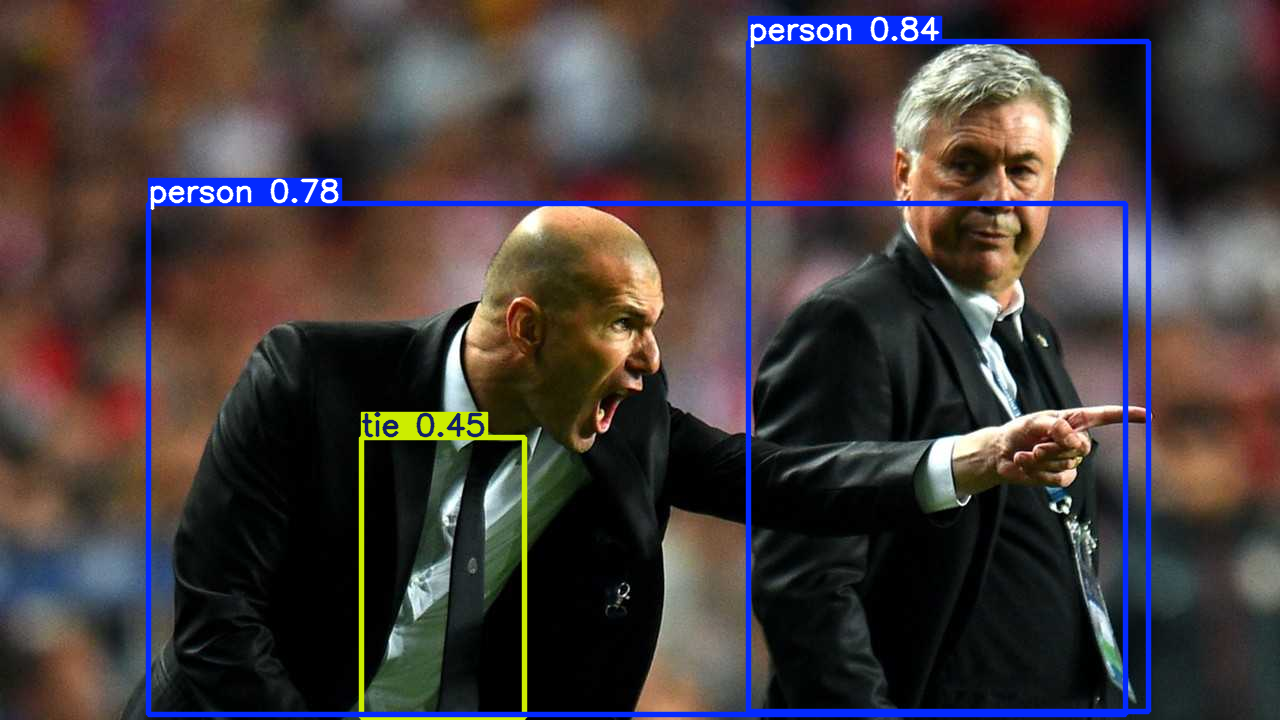

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv11 model
model = YOLO('yolo11n.pt')  # 'n' stands for nano version; other versions include 's', 'm', 'l', 'x'

# Run YOLO on a sample image
results = model('https://ultralytics.com/images/zidane.jpg')
results[0].show()

Task 2: Dataset Preparation & Preprocessing Objective: Load and preprocess a dataset for object detection.

Instructions:

Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg. Convert Annotations – Use Roboflow to export the dataset in YOLO format. Download the Dataset – Use the Roboflow API to fetch the dataset. Split the Dataset – Divide into train (80%), validation (10%), and test (10%). Expected Outcome: A well-structured dataset in YOLO format.

In [ ]:
!pip install roboflow


In [ ]:
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="Z36dR2kczFGORe8fzTeh")


In [ ]:
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = project.version(1).download("yolov11")


Extracting Dataset Version Zip to vehicles-1 in yolov11:: 100%|██████████| 8128/8128 [00:04<00:00, 1933.94it/s]


In [ ]:
import os
dataset_path = "/content/vehicles-1"
print(os.listdir(dataset_path))

['train', 'data.yaml', 'valid', 'test', 'README.roboflow.txt', 'README.dataset.txt']


In [ ]:
yaml_path = "/content/vehicles-1/data.yaml"

with open(yaml_path, "r") as file:
    print(file.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 12
names: ['big bus', 'big truck', 'bus-l-', 'bus-s-', 'car', 'mid truck', 'small bus', 'small truck', 'truck-l-', 'truck-m-', 'truck-s-', 'truck-xl-']

roboflow:
  workspace: roboflow-100
  project: vehicles-q0x2v
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-100/vehicles-q0x2v/dataset/1


In [ ]:
import yaml

# Load and update YAML file with correct paths
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

correct_paths = {
    "train": "/content/vehicles-1/train",
    "val": "/content/vehicles-1/valid",
    "test": "/content/vehicles-1/test"
}

data.update(correct_paths)

with open(yaml_path, "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print("✅ data.yaml paths have been updated successfully!")


✅ data.yaml paths have been updated successfully!


In [ ]:
with open(yaml_path, "r") as file:
    print(file.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 12
names: ['big bus', 'big truck', 'bus-l-', 'bus-s-', 'car', 'mid truck', 'small bus', 'small truck', 'truck-l-', 'truck-m-', 'truck-s-', 'truck-xl-']

roboflow:
  workspace: roboflow-100
  project: vehicles-q0x2v
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-100/vehicles-q0x2v/dataset/1


In [ ]:
# Check GPU availability
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


False
0
No GPU detected


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolo11n.pt")
results = model.train(
    data="/content/vehicles-1/data.yaml",
    epochs=5,
    batch=8,
    device='cpu'  # Use GPU
)


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/vehicles-1/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/vehicles-1/train/labels... 2634 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2634/2634 [00:01<00:00, 1442.60it/s]

train: WARNING ⚠️ /content/vehicles-1/train/images/adit_mp4-1357_jpg.rf.cd42ad897bad30838e19f2c8d67fcbf2.jpg: 2 duplicate labels removed


train: New cache created: /content/vehicles-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/vehicles-1/valid/labels... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<00:00, 1818.68it/s]

val: New cache created: /content/vehicles-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G       1.48      2.724       1.14         16        640: 100%|██████████| 330/330 [38:14<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [06:14<00:00,  6.13s/it]


                   all        966      13450      0.312      0.307      0.171        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.365      1.577      1.103         30        640: 100%|██████████| 330/330 [37:49<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [05:48<00:00,  5.71s/it]


                   all        966      13450      0.377      0.351      0.227       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.323       1.42      1.089         34        640: 100%|██████████| 330/330 [37:49<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [05:53<00:00,  5.79s/it]


                   all        966      13450      0.473      0.361      0.313      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.296      1.322      1.082         42        640: 100%|██████████| 330/330 [38:21<00:00,  6.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [05:40<00:00,  5.58s/it]


                   all        966      13450      0.427       0.42      0.346      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.263      1.227      1.066         66        640: 100%|██████████| 330/330 [37:34<00:00,  6.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [05:33<00:00,  5.47s/it]


                   all        966      13450      0.443      0.453      0.349      0.234

5 epochs completed in 3.654 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [04:29<00:00,  4.42s/it]


                   all        966      13450      0.443      0.453      0.349      0.233
               big bus        210        273      0.705      0.608      0.701      0.521
             big truck        404       1162       0.69       0.42      0.588       0.35
                bus-l-          8          8     0.0143        0.5     0.0111    0.00494
                bus-s-         12         12          1          0     0.0031    0.00257
                   car        927       8537      0.799      0.772      0.819       0.46
             mid truck        118        257      0.399     0.0934      0.126      0.097
             small bus         43         49          0          0       0.01     0.0072
           small truck        517       1721      0.629      0.513      0.574      0.338
              truck-l-        266        433      0.309      0.617       0.38      0.285
              truck-m-        331        629      0.271      0.781       0.38      0.283
              truck-s

In [ ]:
# Save the trained model weights
best_model_path = "/content/runs/detect/train/weights/best.pt"
print(f"Model training complete. Best model saved at: {best_model_path}")

Model training complete. Best model saved at: /content/runs/detect/train/weights/best.pt


# Task 4: Model Inference and Evaluation

In [ ]:
# Load the trained model
model = YOLO(best_model_path)

In [ ]:
image_path = "/content/vehicles-1/test/images/adit_mp4-815_jpg.rf.fb532f30f712174b620afee0cfb1bfbb.jpg"
results = model(image_path, save=True, conf=0.5)


image 1/1 /content/vehicles-1/test/images/adit_mp4-815_jpg.rf.fb532f30f712174b620afee0cfb1bfbb.jpg: 640x640 3 cars, 1 truck-m-, 376.4ms
Speed: 5.6ms preprocess, 376.4ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


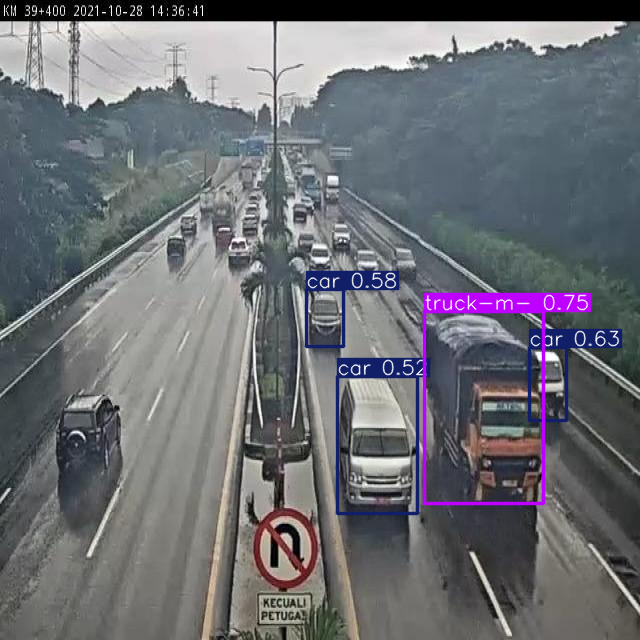

In [ ]:
for result in results:
    result.show()

In [ ]:
# Evaluate the model performance
metrics = model.val()

map_50 = metrics.box.map50  # mAP@50
map_50_95 = metrics.box.map  # mAP@50-95
precision = metrics.box.p.mean().item() if metrics.box.p.size > 0 else 0.0
recall = metrics.box.r.mean().item() if metrics.box.r.size > 0 else 0.0

print(f"\U0001F4CA mAP@50: {map_50:.4f}")
print(f"\U0001F4CA mAP@50-95: {map_50_95:.4f}")
print(f"\U0001F4C8 Precision: {precision:.4f}")
print(f"\U0001F4C9 Recall: {recall:.4f}")

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"\U0001F525 F1 Score: {f1_score:.4f}")
else:
    print("⚠ Cannot compute F1 Score (Precision + Recall = 0)")

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/vehicles-1/valid/labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [04:42<00:00,  4.63s/it]


                   all        966      13450      0.443      0.453      0.349      0.233
               big bus        210        273      0.705      0.608      0.701      0.521
             big truck        404       1162       0.69       0.42      0.588       0.35
                bus-l-          8          8     0.0143        0.5     0.0111    0.00494
                bus-s-         12         12          1          0     0.0031    0.00257
                   car        927       8537      0.799      0.772      0.819       0.46
             mid truck        118        257      0.399     0.0934      0.126      0.097
             small bus         43         49          0          0       0.01     0.0072
           small truck        517       1721      0.629      0.513      0.574      0.338
              truck-l-        266        433      0.309      0.617       0.38      0.285
              truck-m-        331        629      0.271      0.781       0.38      0.283
              truck-s

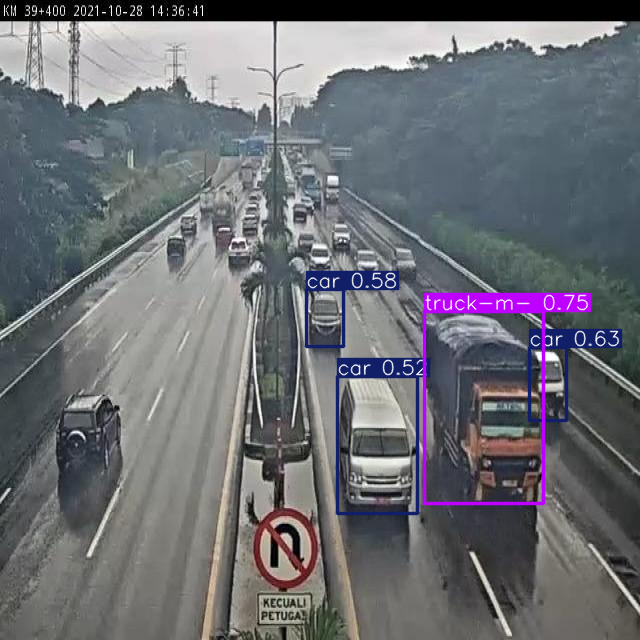

In [ ]:
for result in results:
    result.show()

Conclusion:-

The project "Vehicle Detection for Smart Traffic Management using YOLOv11" successfully implemented real-time object detection to identify vehicles such as cars, buses, and auto-rickshaws. The model demonstrated strong precision, indicating high confidence in its predictions. However, recall was relatively lower, highlighting missed detections.

Challenges were observed in detecting specific violations like helmet and no-helmet detection, which suggests the need for additional training data and optimized hyperparameters. Future improvements could focus on data augmentation, fine-tuning the YOLOv11 model, and exploring alternative architectures to enhance overall detection accuracy.

This project provides a foundational framework for automated traffic monitoring and violation detection, which can be further refined for real-world deployment in smart city applications.